In [2]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv("DailyDelhiClimateTrain.csv")
print(data.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [3]:
print(data.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


In [5]:
figure = px.line(data, x="date", 
                 y="meantemp", 
                 title='Mean Temperature in Delhi Over the Years')
figure.show()

In [6]:
figure = px.line(data, x="date", 
                 y="humidity", 
                 title='Humidity in Delhi Over the Years')
figure.show()

In [7]:
figure = px.line(data, x="date", 
                 y="wind_speed", 
                 title='Wind Speed in Delhi Over the Years')
figure.show()

In [17]:
!python -m pip install statsmodels

In [11]:
figure = px.scatter(data_frame = data, x="humidity",
                    y="meantemp", size="meantemp", 
                    trendline="ols", 
                    title = "Relationship Between Temperature and Humidity")
figure.show()

# Analyzing Temperature Change

Now let’s analyze the temperature change in Delhi over the years. For this task, I will first convert the data type of the date column into datetime. Then I will add two new columns in the dataset for year and month values.

Here’s how we can change the data type and extract year and month data from the date column:

In [12]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


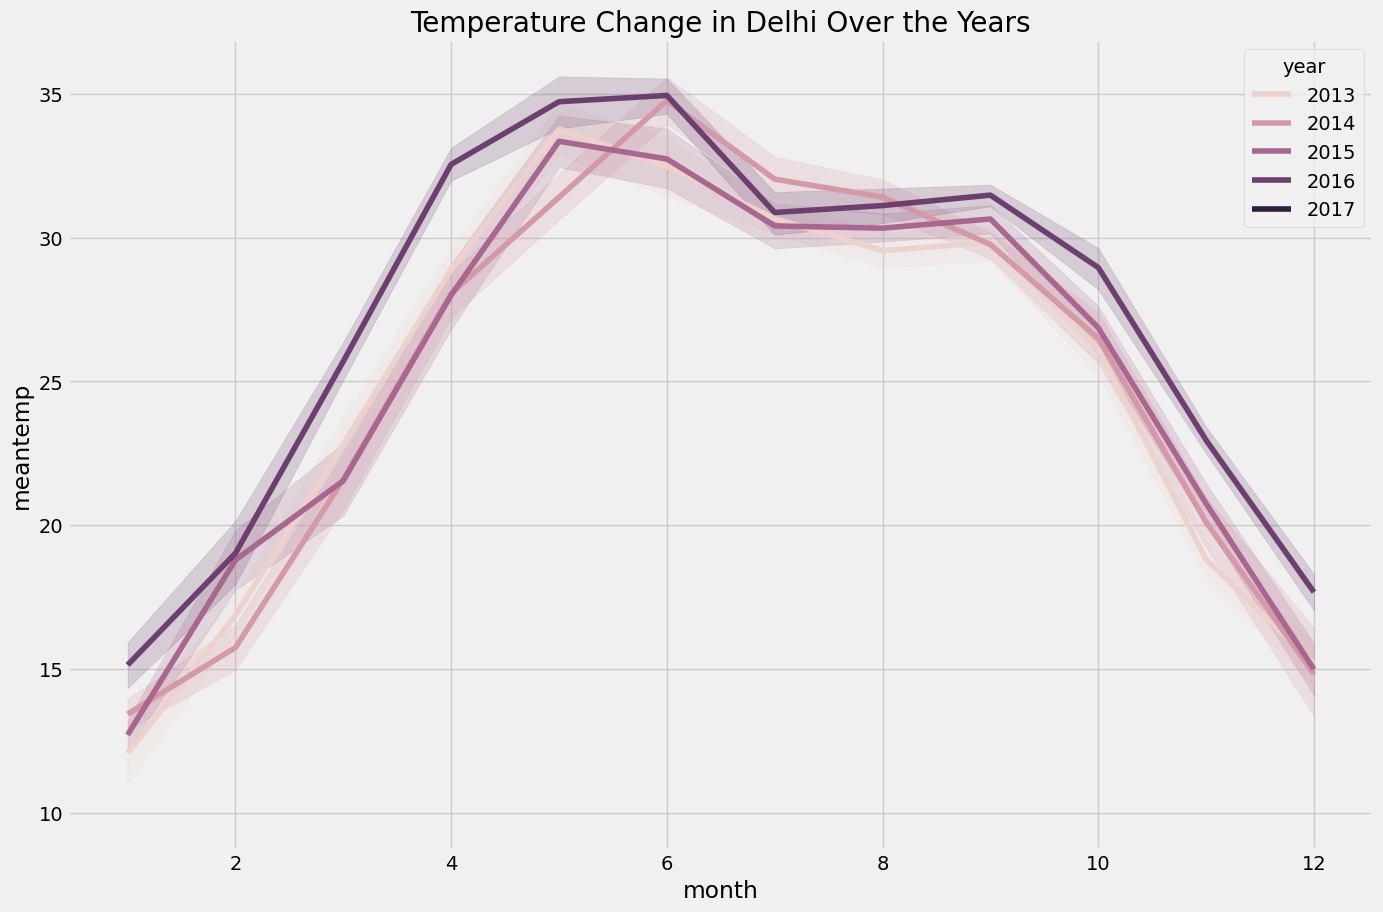

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='meantemp', hue='year')
plt.show()

Although 2017 was not the hottest year in the summer, we can see a rise in the average temperature of Delhi every year.

# Forecasting Weather using Python

Now let’s move to the task of weather forecasting. I will be using the Facebook prophet model for this task. The Facebook prophet model is one of the best techniques for time series forecasting.

In [15]:
!pip  install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/88/d6/ebc199ba1fd99719c8680b3fb90663aa4888871364c69bbf9629148b9724/prophet-1.1.4-py3-none-win_amd64.whl.metadata
     ---------------------------------------- 0.0/83.2 kB ? eta -:--:--
     ---------------------------------------- 83.2/83.2 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/47.9 kB ? eta -:--:--
     ---------------------------------------- 47.9/47.9 kB ? eta 0:00:00
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/4d/bd/1869fa353dfaf3390f6d47df683d9a32a527803e5be54d74606be8b89eee/holidays-0.31-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/25/d4/592f53ce2f8dde8be5720851bd0ab71cc2e76c55978e4163ef1ab7e389bb/importlib_resources-6.0.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/5.8 MB ? eta -:--:-

In [16]:
forecast_data = data.rename(columns = {"date": "ds", 
                                       "meantemp": "y"})
print(forecast_data)

             ds          y    humidity  wind_speed  meanpressure  year  month
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667  2013      1
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000  2013      1
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667  2013      1
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667  2013      1
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000  2013      1
...         ...        ...         ...         ...           ...   ...    ...
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217  2016     12
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762  2016     12
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762  2016     12
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000  2016     12
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000  2017      1

[1462 rows x 7 columns]


In [28]:
%pip install prophet==1.1.1

  error: subprocess-exited-with-error
  
  × Building wheel for prophet (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [313 lines of output]
      <string>:13: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\prophet
      creating build\lib.win-amd64-cpython-311\prophet\stan_model
      Compiling cmdstanpy model
      C++ toolchain 'RTools' version: 4.0
      Install directory: C:\Users\LENOVO\.cmdstan
      Download successful, file: RTools40.exe
      Installing the C++ toolchain: RTools40
      RTools40.exe /SP- /SILENT /SUPPRESSMSGBOXES /CURRENTUSER LANG="English" /DIR="Users\LENOVO\.cmdstan\RTools40" /NOICONS /NORESTART
      Installed RTools40
      pacman -Sy mingw-w64-x86_64-make --noconfirm
      :: Synchron


  Using cached prophet-1.1.1.tar.gz (66 kB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Obtaining dependency information for wheel>=0.37.0 from https://files.pythonhosted.org/packages/b8/8b/31273bf66016be6ad22bb7345c37ff350276cfd46e389a0c2ac5da9d9073/wheel-0.41.2-py3-none-any.whl.metadata
  Using cached wheel-0.41.2-py3-none-any.whl.metadata (2.2 kB)
Using cached wheel-0.41.2-py3-none-any.whl (64 kB)
Failed to build prophet


In [29]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

19:44:57 - cmdstanpy - INFO - Chain [1] start processing
19:44:57 - cmdstanpy - INFO - Chain [1] done processing
19:44:57 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
19:44:57 - cmdstanpy - INFO - Chain [1] start processing
19:44:57 - cmdstanpy - INFO - Chain [1] done processing
19:44:57 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization! Command 'C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=19720 data file=C:\Users\LENOVO\AppData\Local\Temp\tmpt8xwmd9n\qguv3x08.json init=C:\Users\LENOVO\AppData\Local\Temp\tmpt8xwmd9n\vtg6g_2h.json output file=C:\Users\LENOVO\AppData\Local\Temp\tmpt8xwmd9n\prophet_modelu5o371_7\prophet_model-20230903194457.csv method=optimize algorithm=newton iter=10000' failed: 